In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scanimagetiffio import SITiffIO
#import utils_image from the parent folder
import sys
sys.path.append("..")
from utils_image import get_meanZstack


In [ ]:
datafolder = '/home/zilong/Desktop/2D2P/Data/183_28072023/'
# read the rotation center from the circlecenter txt file
circlecenterfilename = datafolder+"DP_exp/circlecenter.txt"
with open(circlecenterfilename, "r") as f:
    # read the last row
    last_line = f.readlines()[-1]
    # assign the x and y coordinates to self.rotx and self.roty
    rotx = float(last_line.split()[0])
    roty = float(last_line.split()[1])
print("Rotation center is at ({}, {})".format(rotx, roty))

zstacktiff = datafolder + 'stack28072023_00005.tif'
zstackrelog = datafolder + 'REdata_20230728_190540.stack00005.txt'

In [2]:
#load the zstack tiff and calculate the mean frames for each stack

zstacktiff = '/home/zilong/Desktop/2D2P/Data/183_28072023/stack_00002.tif'
ztstackrelog = '/home/zilong/Desktop/2D2P/Data/183_25072023/REdata_20230725_160414.txt'

volume = 1; stacks=71; frames=200; Rotcenter=[rotx, roty]; ImgReg=False

#load the zstack data
S = SITiffIO()
S.open_tiff_file(zstacktiff, "r")
S.open_rotary_file(ztstackrelog)
S.interp_times() 
#get the mean frames for each stack
meanZ = get_meanZstack(S, volume, stacks, frames, Rotcenter, ImgReg)


Loading rotary encoder file: /home/zilong/Desktop/2D2P/Data/183_25072023/REdata_20230725_160414.txt
Finished calculating rotations and times.
The rotary encoder file has 17935 timestamps in it.
Counted 4100 frames


In [3]:
# read the rotation center from the circlecenter txt file
circlecenterfilename = "/home/zilong/Desktop/2D2P/Data/183_25072023/DP/circlecenter.txt"
with open(circlecenterfilename, "r") as f:
    # read the last row
    last_line = f.readlines()[-1]
    # assign the x and y coordinates to self.rotx and self.roty
    rotx = float(last_line.split()[0])
    roty = float(last_line.split()[1])

In [4]:
# load the imaging tiff and read the last 500 frames and get the mean frame
#load the imaging tiff 
imagingtiff = '/home/zilong/Desktop/2D2P/Data/183_25072023/25072023_00003.tif'
imagingrelog = '/home/zilong/Desktop/2D2P/Data/183_25072023/REdata_20230725_155545.txt'

S = SITiffIO()
S.open_tiff_file(imagingtiff, "r")
S.open_rotary_file(imagingrelog)
#extract the last self.numFrames frames from the tiff file
tailArray, tailAng = S.tail(500)
        
# unrotate each frame in the tiff file with the detected rotation center
unrotFrames  = UnrotateCropFrame(tailArray, tailAng, rotCenter=[rotx,roty])

#perform image registraion
meanRegImg, regFrames = RegFrame(unrotFrames)

Loading rotary encoder file: /home/zilong/Desktop/2D2P/Data/183_25072023/REdata_20230725_155545.txt
Calculating rotations and times from rotary encoder data...
Finished calculating rotations and times.
The rotary encoder file has 29392 timestamps in it.
Counted 9000 frames
Reference frame, 8.34 sec.
Registered 200/1000 in 5.31s
Registered 400/1000 in 9.89s
Registered 600/1000 in 14.46s
Registered 800/1000 in 18.80s
Registered 1000/1000 in 23.25s


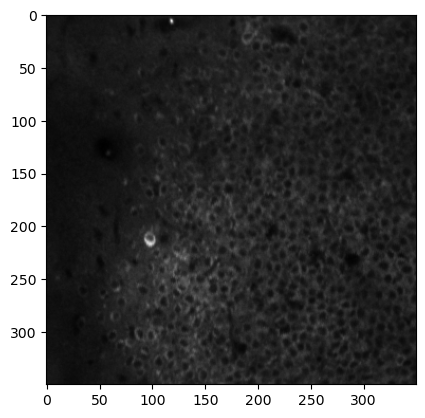

In [5]:
#visual the meanRegImg
plt.imshow(meanRegImg, cmap='gray')